In [133]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [134]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [135]:
NUM_CLASSES = 35

# Dataset reading

In [136]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [137]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [139]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [140]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_12 (Dropout)        (None, 42)                0         
                                                                 
 dense_18 (Dense)            (None, 20)                860       
                                                                 
 dropout_13 (Dropout)        (None, 20)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 35)                385       
                                                                 
Total params: 1455 (5.68 KB)
Trainable params: 1455 (5.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [142]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [143]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
187/201 [==========================>...] - ETA: 0s - loss: 3.3869 - accuracy: 0.0604
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 1s 2ms/step - loss: 3.3665 - accuracy: 0.0631 - val_loss: 2.9378 - val_accuracy: 0.1862
Epoch 2/1000
141/201 [====================>.........] - ETA: 0s - loss: 2.8539 - accuracy: 0.1515

d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/201 [===========================>..] - ETA: 0s - loss: 2.7902 - accuracy: 0.1644
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 1ms/step - loss: 2.7721 - accuracy: 0.1673 - val_loss: 2.1313 - val_accuracy: 0.4433
Epoch 3/1000
193/201 [===========================>..] - ETA: 0s - loss: 2.3474 - accuracy: 0.2526
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 2.3426 - accuracy: 0.2530 - val_loss: 1.7257 - val_accuracy: 0.6864
Epoch 4/1000
175/201 [=========================>....] - ETA: 0s - loss: 2.1258 - accuracy: 0.3085
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
201/201 [==============================] - 0s 2ms/step - loss: 2.1149 - accuracy: 0.3110 - val_loss: 1.4749 - val_accuracy: 0.7016
Epoch 5/1000
192/201 [===========================>..] - ETA: 0s - loss: 1.9818 - accuracy: 0.3436


In [144]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

67/67 [==============================] - 0s 777us/step - loss: 0.4273 - accuracy: 0.9290


In [145]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [146]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 50ms/step
[0.0000000e+00 8.8853641e-21 1.6755959e-15 1.5333400e-34 6.9042802e-32
 2.1903738e-28 7.4655688e-23 0.0000000e+00 1.8338821e-32 6.0044007e-18
 1.2986817e-10 2.5706139e-09 7.4900672e-02 1.3262516e-26 3.0341889e-14
 1.4567786e-06 2.9904400e-05 1.7685933e-02 7.8096036e-21 2.0178129e-04
 1.1153260e-33 5.0707627e-38 6.4324797e-07 1.1919677e-07 7.4656808e-01
 4.7283851e-07 2.3789468e-18 2.4388689e-09 5.2165783e-09 1.7427251e-20
 2.5953626e-11 0.0000000e+00 4.6649431e-30 1.6061094e-01 1.1658897e-19]
24


# Confusion matrix

268/268 [==============================] - 0s 515us/step


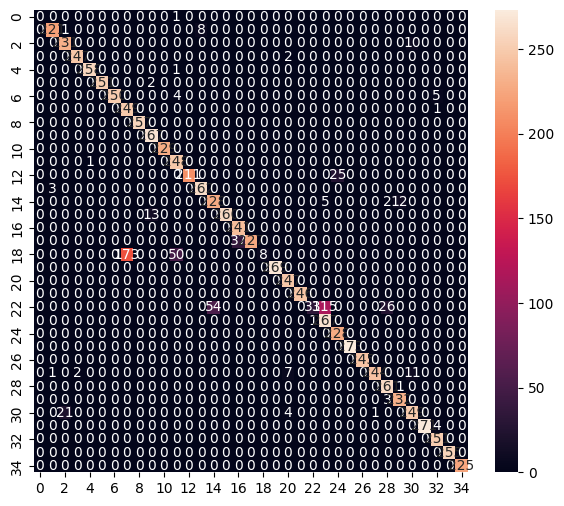

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      0.96      0.97       230
           2       0.91      0.96      0.94       241
           3       0.99      0.99      0.99       249
           4       1.00      1.00      1.00       259
           5       1.00      0.99      1.00       253
           6       1.00      0.97      0.98       259
           7       0.59      1.00      0.74       250
           8       1.00      1.00      1.00       257
           9       0.95      1.00      0.97       267
          10       1.00      1.00      1.00       229
          11       0.82      1.00      0.90       249
          12       1.00      0.89      0.94       236
          13       0.97      0.99      0.98       265
          14       0.81      0.92      0.86       247
          15       1.00      0.95      0.98       273
          16       0.87      1.00      0.93       241
     

d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [148]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [149]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\adity\AppData\Local\Temp\tmp9pmhclay\assets


INFO:tensorflow:Assets written to: C:\Users\adity\AppData\Local\Temp\tmp9pmhclay\assets


7972

# Inference test

In [150]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [151]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [152]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [153]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [154]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.0000000e+00 8.8853011e-21 1.6755714e-15 1.5333528e-34 6.9043372e-32
 2.1903921e-28 7.4655448e-23 0.0000000e+00 1.8338832e-32 6.0044036e-18
 1.2986777e-10 2.5706106e-09 7.4900746e-02 1.3262474e-26 3.0341967e-14
 1.4567836e-06 2.9904249e-05 1.7685903e-02 7.8095794e-21 2.0178042e-04
 1.1153268e-33 5.0707666e-38 6.4324655e-07 1.1919628e-07 7.4656856e-01
 4.7283567e-07 2.3789574e-18 2.4388562e-09 5.2165614e-09 1.7427130e-20
 2.5953394e-11 0.0000000e+00 4.6648747e-30 1.6061042e-01 1.1658861e-19]
24
